In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker

In [3]:
prod_ind_data = pd.read_csv('Dataset/archive/fao_data_production_indices_data.csv')

In [4]:
prod_ind_data
prod_ind_data['year']=prod_ind_data['year'].astype(pd.Int64Dtype())

In [5]:
 print(prod_ind_data.category.unique())

['agriculture_pin' 'crops_pin' 'food_pin' 'livestock_pin' 'non_food_pin']


In [6]:
agri_data = prod_ind_data[prod_ind_data['category']=='agriculture_pin']
agri_data

,country_or_area,element_code,element,year,unit,value,value_footnotes,category
0,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2007,1000 Int. $,2486910.0,A,agriculture_pin
1,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2006,1000 Int. $,2278516.0,A,agriculture_pin
2,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2005,1000 Int. $,2524097.0,A,agriculture_pin
3,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2004,1000 Int. $,2226346.0,A,agriculture_pin
4,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2003,1000 Int. $,2289434.0,A,agriculture_pin
...,...,...,...,...,...,...,...,...
64093,Zimbabwe,438,Net per capita PIN (base 1999-2001),1963,Int. $,113.0,A,agriculture_pin
64094,Zimbabwe,438,Net per capita PIN (base 1999-2001),1962,Int. $,127.0,A,agriculture_pin
64095,Zimbabwe,438,Net per capita PIN (base 1999-2001),1961,Int. $,124.0,A,agriculture_pin
64096,fnSeqID,Footnote,NaN,<NA>,NaN,NaN,NaN,agriculture_pin


In [7]:
agri_data.columns

Index(['country_or_area', 'element_code', 'element', 'year', 'unit', 'value',
       'value_footnotes', 'category'],
      dtype='object')

In [8]:
missing_cols = agri_data.columns[agri_data.isnull().any()]
print(missing_cols)

Index(['element', 'year', 'unit', 'value', 'value_footnotes'], dtype='object')


In [9]:
#Remove rows that contain null values
agri_data.dropna(inplace=True)
agri_data

C:\Users\saumy\AppData\Local\Temp\ipykernel_23456\4138272869.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agri_data.dropna(inplace=True)


,country_or_area,element_code,element,year,unit,value,value_footnotes,category
0,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2007,1000 Int. $,2486910.0,A,agriculture_pin
1,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2006,1000 Int. $,2278516.0,A,agriculture_pin
2,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2005,1000 Int. $,2524097.0,A,agriculture_pin
3,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2004,1000 Int. $,2226346.0,A,agriculture_pin
4,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2003,1000 Int. $,2289434.0,A,agriculture_pin
...,...,...,...,...,...,...,...,...
64091,Zimbabwe,438,Net per capita PIN (base 1999-2001),1965,Int. $,113.0,A,agriculture_pin
64092,Zimbabwe,438,Net per capita PIN (base 1999-2001),1964,Int. $,128.0,A,agriculture_pin
64093,Zimbabwe,438,Net per capita PIN (base 1999-2001),1963,Int. $,113.0,A,agriculture_pin
64094,Zimbabwe,438,Net per capita PIN (base 1999-2001),1962,Int. $,127.0,A,agriculture_pin


In [10]:
print(agri_data.element.unique())

['Gross Production 1999-2001 (1000 I$)'
 'Net Production 1999-2001 (1000 I$)' 'Gross PIN (base 1999-2001)'
 'Grs per capita PIN (base 1999-2001)' 'Net PIN (base 1999-2001)'
 'Net per capita PIN (base 1999-2001)']


In [11]:
gross_prod_data = agri_data.drop(agri_data[agri_data['element'] != 'Gross Production 1999-2001 (1000 I$)'].index)
gross_prod_data

,country_or_area,element_code,element,year,unit,value,value_footnotes,category
0,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2007,1000 Int. $,2486910.0,A,agriculture_pin
1,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2006,1000 Int. $,2278516.0,A,agriculture_pin
2,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2005,1000 Int. $,2524097.0,A,agriculture_pin
3,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2004,1000 Int. $,2226346.0,A,agriculture_pin
4,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2003,1000 Int. $,2289434.0,A,agriculture_pin
...,...,...,...,...,...,...,...,...
63856,Zimbabwe,152,Gross Production 1999-2001 (1000 I$),1965,1000 Int. $,687546.0,A,agriculture_pin
63857,Zimbabwe,152,Gross Production 1999-2001 (1000 I$),1964,1000 Int. $,740738.0,A,agriculture_pin
63858,Zimbabwe,152,Gross Production 1999-2001 (1000 I$),1963,1000 Int. $,625430.0,A,agriculture_pin
63859,Zimbabwe,152,Gross Production 1999-2001 (1000 I$),1962,1000 Int. $,679806.0,A,agriculture_pin


In [12]:

focused_data = gross_prod_data[['country_or_area', 'year', 'value']]
focused_data.head()

,country_or_area,year,value
0,Afghanistan,2007,2486910.0
1,Afghanistan,2006,2278516.0
2,Afghanistan,2005,2524097.0
3,Afghanistan,2004,2226346.0
4,Afghanistan,2003,2289434.0


In [13]:
#Rename columns
focused_data.columns = ['Country', 'Year', 'Gross_Production']
focused_data.head()

,Country,Year,Gross_Production
0,Afghanistan,2007,2486910.0
1,Afghanistan,2006,2278516.0
2,Afghanistan,2005,2524097.0
3,Afghanistan,2004,2226346.0
4,Afghanistan,2003,2289434.0


In [14]:
# Pivot the DataFrame
pivot_df = focused_data.pivot(index='Country', columns='Year', values='Gross_Production')

# Print the resulting pivoted DataFrame
print(pivot_df.head())

Year                  1961        1962        1963        1964        1965  \
Country                                                                      
Afghanistan      1365296.0   1393857.0   1399596.0   1489104.0   1550441.0   
Africa +        40235510.0  42469530.0  44027500.0  44810030.0  45741720.0   
Albania           254771.0    274898.0    274310.0    301150.0    291325.0   
Algeria          1639496.0   1738226.0   1742950.0   1551149.0   1793427.0   
American Samoa      1750.0      1785.0      2000.0      2005.0      2057.0   

Year                  1966        1967        1968        1969        1970  \
Country                                                                      
Afghanistan      1575538.0   1717742.0   1790886.0   1829964.0   1658073.0   
Africa +        45589030.0  48631010.0  49961520.0  52174760.0  54258640.0   
Albania           329062.0    343560.0    343240.0    351221.0    366693.0   
Algeria          1209707.0   1345804.0   1729201.0   1601248.0 

In [15]:
# Calculate the total Gross_Production for each country
pivot_df['Total'] = pivot_df.sum(axis=1)

pivot_df.sort_values(['Total'], ascending=False, axis=0, inplace=True)

print(pivot_df.head())

Year                   1961         1962         1963         1964  \
Country                                                              
World +         607542000.0  627390800.0  642877400.0  666254900.0   
Asia +          179038900.0  184564800.0  191333500.0  199301800.0   
Europe +        224694200.0  231333600.0  231958200.0  244458600.0   
Americas +      151225800.0  155494300.0  161601700.0  162971000.0   
Eastern Asia +   73769500.0   76666790.0   80440290.0   85929400.0   

Year                   1965         1966         1967         1968  \
Country                                                              
World +         678915200.0  704418100.0  729306100.0  751235800.0   
Asia +          203996300.0  211505700.0  218894900.0  225444700.0   
Europe +        244380200.0  260177100.0  269648400.0  278052900.0   
Americas +      170410400.0  171724600.0  177427800.0  181386000.0   
Eastern Asia +   92461040.0   98721230.0  100686100.0  101181100.0   

Year              

In [16]:
world_total_prod = pivot_df[pivot_df.index.str.contains('World +')]['Total']
world_1961_prod = pivot_df[pivot_df.index.str.contains('World +')][1961]
world_2007_prod = pivot_df[pivot_df.index.str.contains('World +')][2007]
print(world_total_prod)
print(world_1961_prod)
print(world_2007_prod)

Country
World +    5.124231e+10
Name: Total, dtype: float64
Country
World +    607542000.0
Name: 1961, dtype: float64
Country
World +    1.692538e+09
Name: 2007, dtype: float64


In [17]:
#Remove countries with + at the end like World + as it includes all the countries in the world
# Filter out rows with row headers ending in "+"
filtered_df = pivot_df[~pivot_df.index.str.endswith('+')]

# Print the resulting DataFrame
print(filtered_df.head(10))

Year                            1961        1962        1963        1964  \
Country                                                                    
China                     58340740.0  60690860.0  63942700.0  68462610.0   
United States of America  89816580.0  90275010.0  93700380.0  94323650.0   
India                     50142680.0  50015760.0  51367730.0  52267720.0   
USSR                      72768810.0  73961920.0  70531000.0  81216890.0   
Brazil                    16564600.0  17344940.0  17443010.0  17658130.0   
France                    23408500.0  26654000.0  25202710.0  25321080.0   
Germany                   22077690.0  24241470.0  25340780.0  24843610.0   
Italy                     18638310.0  19289340.0  18918070.0  19893760.0   
Argentina                 11950390.0  12519320.0  13694660.0  12918230.0   
Indonesia                  7383684.0   8054871.0   7650931.0   8076970.0   

Year                            1965        1966         1967         1968  \
Country  

In [18]:
print('Top 10 countries production in 1961', filtered_df[1961].sum(axis = 0, skipna = True))
other_1961_prod = world_1961_prod - filtered_df[1961].sum(axis = 0, skipna = True)
print('Other countries production in 1961', other_1961_prod)

print('Top 10 countries production in 2007', filtered_df[2007].sum(axis = 0, skipna = True))
other_2007_prod = world_2007_prod - filtered_df[2007].sum(axis = 0, skipna = True)
print('Other countries production in 2007', other_2007_prod)


Top 10 countries production in 1961 607541893.0
Other countries production in 1961 Country
World +    107.0
Name: 1961, dtype: float64
Top 10 countries production in 2007 1692537702.0
Other countries production in 2007 Country
World +    298.0
Name: 2007, dtype: float64


In [19]:
def plot_piechart(df, keys, title):
    
    palette_color = sns.color_palette('bright')
    plt.figure(figsize=(16,8))  
    # plotting data on chart
    plt.pie(df, labels=keys, colors=palette_color, autopct='%.0f%%')
    plt.title(title)
    # displaying chart
    plt.show()

C:\Users\saumy\AppData\Local\Temp\ipykernel_23456\1832342914.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_1961 = filtered_df[1961].head(10).append(other_1961_prod)


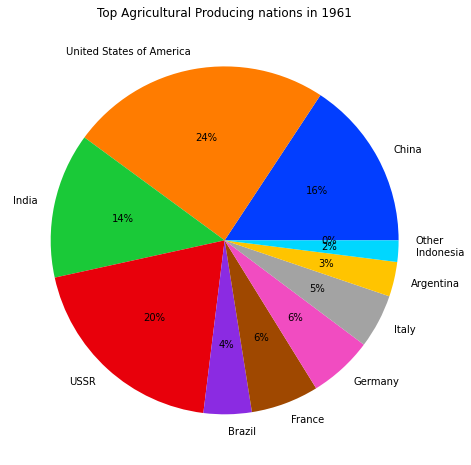

In [20]:
df_1961 = filtered_df[1961].head(10).append(other_1961_prod)
df_1961 = df_1961.rename(index = {'World +':"Other"})
keys = df_1961.index
title = "Top Agricultural Producing nations in 1961"
plot_piechart(df_1961, keys, title)

C:\Users\saumy\AppData\Local\Temp\ipykernel_23456\1143470753.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2007 = filtered_df[2007].head(10).fillna(0).append(other_2007_prod)


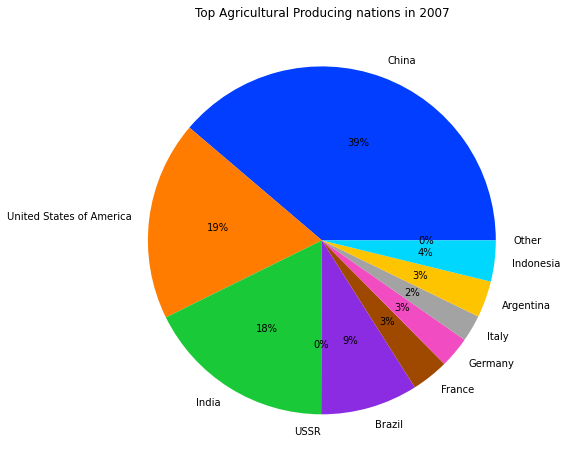

In [21]:
df_2007 = filtered_df[2007].head(10).fillna(0).append(other_2007_prod)
df_2007 = df_2007.rename(index = {'World +':"Other"})
keys = df_2007.index
title = "Top Agricultural Producing nations in 2007"
plot_piechart(df_2007, keys, title)

China became the major producer in 2007 whereas USA was the top producer in 1961. Let's see if the overall production declined over the years for USA.

In [22]:
df = filtered_df.head(10).transpose()
df.drop(df.tail(1).index,inplace=True) #Drop last row of Total produce
print(df)

Country        China  United States of America        India         USSR  \
Year                                                                       
1961      58340740.0                89816580.0   50142680.0   72768810.0   
1962      60690860.0                90275010.0   50015760.0   73961920.0   
1963      63942700.0                93700380.0   51367730.0   70531000.0   
1964      68462610.0                94323650.0   52267720.0   81216890.0   
1965      74747900.0                97704050.0   49498330.0   80941960.0   
1966      80445930.0                97277180.0   49309560.0   90781310.0   
1967      81718660.0               101177900.0   52731470.0   92659220.0   
1968      81474800.0               103420600.0   55208160.0   98507460.0   
1969      82195340.0               104285200.0   56970870.0   93745540.0   
1970      86542200.0               102786400.0   60053830.0  100571500.0   
1971      90085190.0               111234700.0   61559940.0  101134000.0   
1972      88

In [23]:
df_filled = df.fillna(0)
print(range(len(df_filled)))
print(df_filled.index.dtype)
print(range(df_filled.index.tolist()[0], df_filled.index.tolist()[-1]+1))

range(0, 47)
object
range(1961, 2008)


In [24]:

# Create a line plot

def plot_lineplot(df):
    fig, ax3 = plt.subplots(1, figsize=(16,8)) 
    sns.lineplot(data=df)
    label_format = '{:,.0f}'
    plt.xlim([df.index.tolist()[0], df.index.tolist()[-1]])
    plt.title("Top Agricultural Producing nations over years")
    plt.xlabel("Year")
    plt.ylabel("Gross Production in 1000 Int.$")
    plt.grid()

    #Set xticks for every year
    #UserWarning: FixedFormatter should only be used together with FixedLocator
    #https://stackoverflow.com/questions/63723514/userwarning-fixedformatter-should-only-be-used-together-with-fixedlocator
    ax3.xaxis.set_major_locator(mticker.MaxNLocator(47))
    ticks_loc = ax3.get_xticks().tolist()
    ax3.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
    ax3.set_xticklabels([label_format.format(x) for x in ticks_loc], rotation=45)
    # Show the plot
    plt.show()    

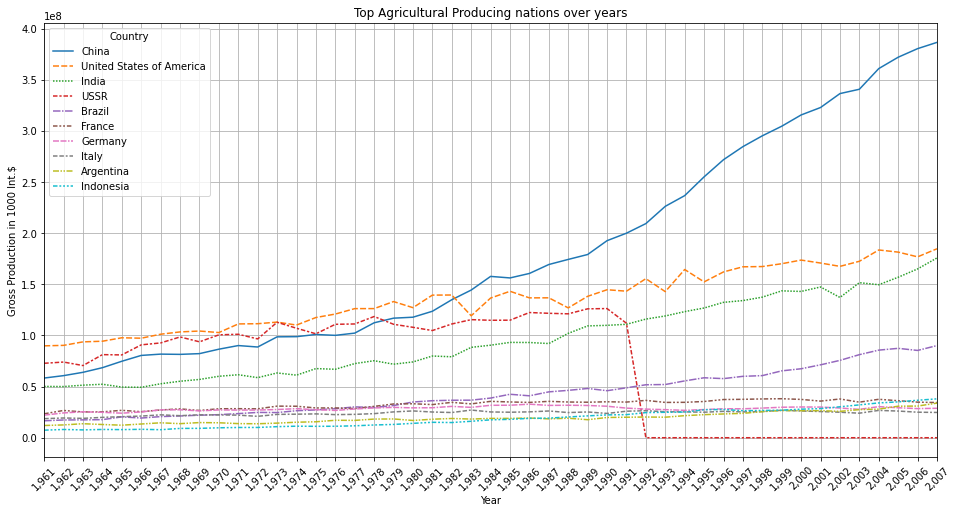

In [25]:
plot_lineplot(df_filled)

In [26]:
# Create a histogram
def plot_boxplot(df):
    plt.figure(figsize=(16,8)) # this creates a figure 8 inch wide, 4 inch high
    ax = sns.boxplot(data=df)

    # Customize the plot
    plt.tight_layout()
    plt.title("Top Agricultural Producing nations over years")
    plt.xlabel("Year")
    plt.ylabel("Gross Production in 1000 Int.$")

    # Show the plot
    plt.show()

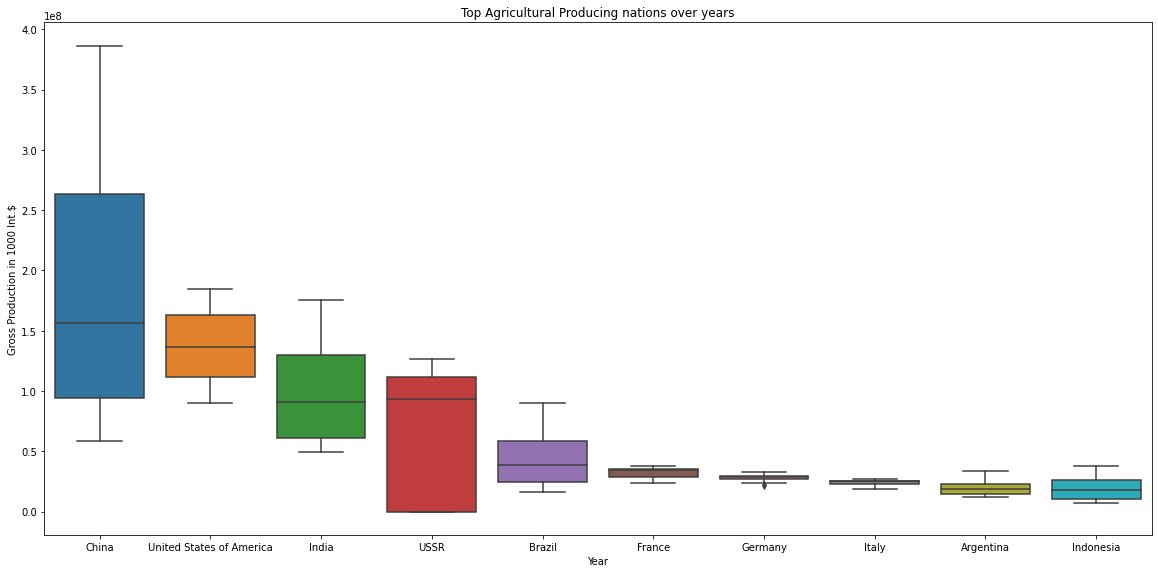

In [27]:
plot_boxplot(df_filled)

In [28]:
# Create a histogram
def plot_histogram(df):
    plt.figure(figsize=(16,8)) # this creates a figure 8 inch wide, 4 inch high
    num_bins = len(df_filled)
    sns.histplot(df, bins=num_bins, kde=False)

    # Customize the plot
    plt.tight_layout()
    plt.title("Top Agricultural Producing nations over years")
    plt.xlabel("Year")
    plt.ylabel("Gross Production in 1000 Int.$")

    # Show the plot
    plt.show()

In [29]:
# plot_histogram(df_filled)

In [30]:
df_filled = df_filled.reset_index() #reset_index() method allows you reset the index back to the default 0, 1, 2 etc indexes
df_reg = df_filled[['Year', 'China', 'United States of America', 'India', 'USSR', 'Brazil', 'France', 'Germany', 'Italy', 'Argentina', 'Indonesia']].copy()
df_reg.head()

Country,Year,China,United States of America,India,USSR,Brazil,France,Germany,Italy,Argentina,Indonesia
0,1961,58340740.0,89816580.0,50142680.0,72768810.0,16564600.0,23408500.0,22077690.0,18638310.0,11950390.0,7383684.0
1,1962,60690860.0,90275010.0,50015760.0,73961920.0,17344940.0,26654000.0,24241470.0,19289340.0,12519320.0,8054871.0
2,1963,63942700.0,93700380.0,51367730.0,70531000.0,17443010.0,25202710.0,25340780.0,18918070.0,13694660.0,7650931.0
3,1964,68462610.0,94323650.0,52267720.0,81216890.0,17658130.0,25321080.0,24843610.0,19893760.0,12918230.0,8076970.0
4,1965,74747900.0,97704050.0,49498330.0,80941960.0,20367240.0,26780910.0,23988490.0,20564500.0,12247380.0,7925503.0


In [119]:
#Linear Regression

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
def plot_linear_reg(df_reg, country):
    data_years = df_reg[['Year']].values
    prod_country = df_reg[[country]].values

    future_years = np.arange(2008, 2019).reshape(-1, 1) #-1 infers the appropriate number of rows, 1 column vector

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(data_years, prod_country)

    # Make predictions for future years
    pred_country = regr.predict(future_years)

    # Calculate accuracy
    y_pred = regr.predict(data_years)
    mse = mean_squared_error(prod_country, y_pred)
    print("MSE for country " +country+ " is: "+str(mse))
#     percentage_mse = (mse / (prod_country.max() - prod_country.min())) * 100
#     print("Accuracy for country "+country+" is: "+str(percentage_mse))

    # Prediction for all years
    years = np.concatenate((data_years, future_years), axis=0) #Concatenate arrays vertically
    all_pred_country = regr.predict(years)

    plt.suptitle('Linear regression for '+str(country))
    plt.subplot(2,1,1)
    plt.plot(data_years, prod_country, '*', label = 'Actual data')
    plt.plot(years, all_pred_country,'.',label = 'Predicted data')
    plt.xlim([min(years), max(years)])
    plt.legend()
    plt.subplot(2,1,2)
    plt.plot(data_years, abs(y_pred-prod_country),label = 'Abs error')
    plt.xlim([min(years), max(years)])
    plt.legend()
    plt.show()
    # print("Mean squared error: %.2f" % mean_squared_error(y, pred))

    # print(np.mean((pred-y)**2))

MSE for country China is: 729737615449292.1


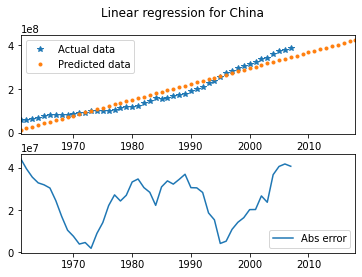

MSE for country United States of America is: 29906972116552.062


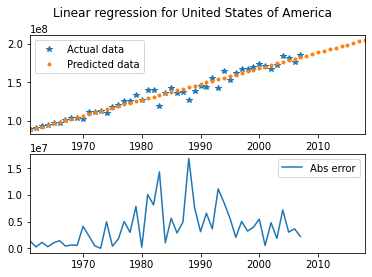

MSE for country India is: 50183467039575.64


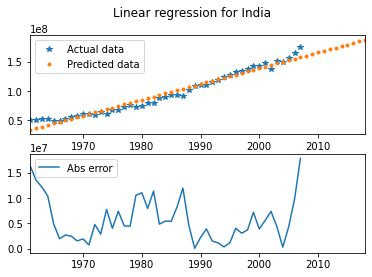

MSE for country Brazil is: 25719339968962.04


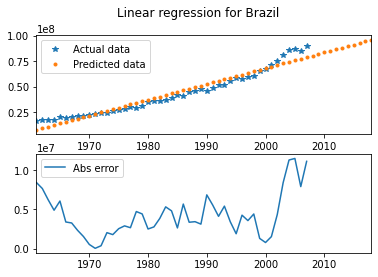

MSE for country France is: 2853586235157.9717


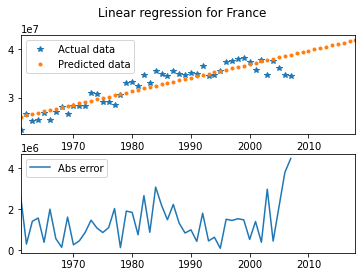

In [120]:
countries = np.array(['China', 'United States of America', 'India', 'Brazil', 'France']) #Top 5 countries excluding USSR
for country in countries:
    plot_linear_reg(df_reg, country)

In [125]:
#Ridge regression
def plot_ridge_reg(df_reg, country):
    data_years = df_reg[['Year']].values
    prod_country = df_reg[[country]].values

    future_years = np.arange(2008, 2019).reshape(-1, 1) #-1 infers the appropriate number of rows, 1 column vector

    # Create linear regression object
    regr = linear_model.Ridge(alpha=1e-9)

    # Train the model using the training sets
    regr.fit(data_years, prod_country)

    # Make predictions for future years
    pred_country = regr.predict(future_years)

    # Calculate accuracy
    y_pred = regr.predict(data_years)
    mse = mean_squared_error(prod_country, y_pred)
    print("MSE for country " +country+ " is: "+str(mse))
#     percentage_mse = (mse / (prod_country.max() - prod_country.min())) * 100
#     print("Accuracy for country "+country+" is: "+str(percentage_mse))

    # Prediction for all years
    years = np.concatenate((data_years, future_years), axis=0) #Concatenate arrays vertically
    all_pred_country = regr.predict(years)

    plt.suptitle('Ridge regression for '+str(country))
    plt.subplot(2,1,1)
    plt.plot(data_years, prod_country, '*', label = 'Actual data')
    plt.plot(years, all_pred_country,'.',label = 'Predicted data')
    plt.xlim([min(years), max(years)])
    plt.legend()
    plt.subplot(2,1,2)
    plt.plot(data_years, abs(y_pred-prod_country),label = 'Abs error')
    plt.xlim([min(years), max(years)])
    plt.legend()
    plt.show()

MSE for country China is: 729737615449292.8


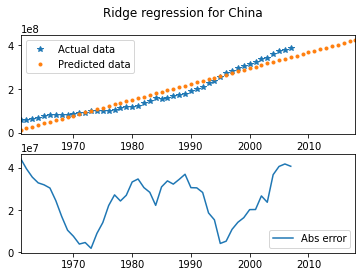

MSE for country United States of America is: 29906972116551.67


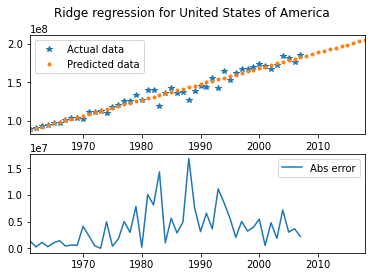

MSE for country India is: 50183467039578.555


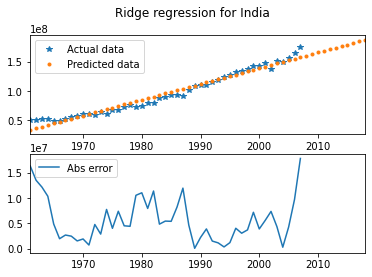

MSE for country Brazil is: 25719339968962.598


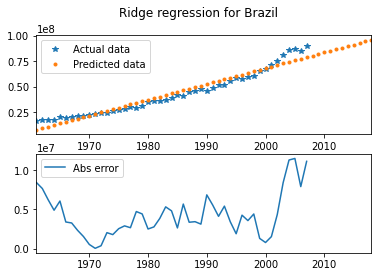

MSE for country France is: 2853586235157.994


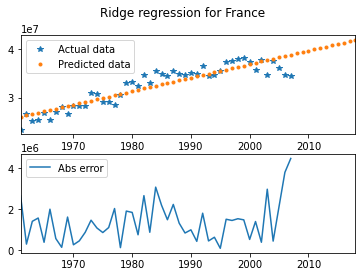

In [126]:
countries = np.array(['China', 'United States of America', 'India', 'Brazil', 'France']) #Top 5 countries excluding USSR
for country in countries:
    plot_ridge_reg(df_reg, country)

In [151]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

def plot_random_forest_reg(df_reg, country):
    data_years = df_reg[['Year']].values
    prod_country = df_reg[[country]].values

    future_years = np.arange(2008, 2019).reshape(-1, 1) #-1 infers the appropriate number of rows, 1 column vector

    # Create random forest object
    regr = RandomForestRegressor(max_depth=10, random_state=0)

    regr.fit(data_years, prod_country)

    # Make predictions for future years
    pred_country = regr.predict(future_years)
    print(pred_country)
    
    # Calculate MSE
    y_pred = regr.predict(data_years)
    mse = metrics.mean_squared_error(prod_country, y_pred)
    print("MSE for country " +country+ " is: "+str(mse))

    # Prediction for all years
    years = np.concatenate((data_years, future_years), axis=0) #Concatenate arrays vertically
    all_pred_country = regr.predict(years)

    plt.suptitle('Random forest for '+str(country))
    plt.plot(data_years, prod_country, '*', label = 'Actual data')
    plt.plot(years, all_pred_country,'.',label = 'Predicted data')
    plt.legend()
    plt.show()
    

C:\Users\saumy\AppData\Local\Temp\ipykernel_23456\708172208.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(data_years, prod_country)


[3.81102627e+08 3.81102627e+08 3.81102627e+08 3.81102627e+08
 3.81102627e+08 3.81102627e+08 3.81102627e+08 3.81102627e+08
 3.81102627e+08 3.81102627e+08 3.81102627e+08]
MSE for country China is: 4370287354821.673


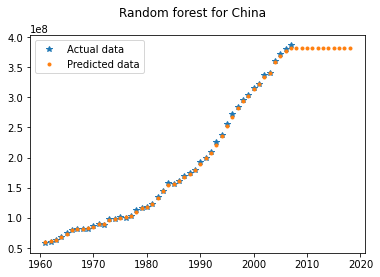

[1.82064451e+08 1.82064451e+08 1.82064451e+08 1.82064451e+08
 1.82064451e+08 1.82064451e+08 1.82064451e+08 1.82064451e+08
 1.82064451e+08 1.82064451e+08 1.82064451e+08]
MSE for country United States of America is: 5950958617982.938


C:\Users\saumy\AppData\Local\Temp\ipykernel_23456\708172208.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(data_years, prod_country)


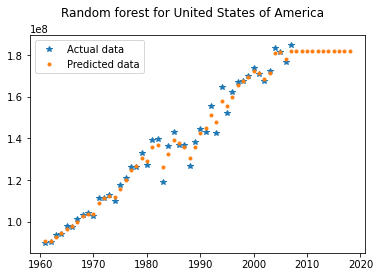

C:\Users\saumy\AppData\Local\Temp\ipykernel_23456\708172208.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(data_years, prod_country)


[1.6931557e+08 1.6931557e+08 1.6931557e+08 1.6931557e+08 1.6931557e+08
 1.6931557e+08 1.6931557e+08 1.6931557e+08 1.6931557e+08 1.6931557e+08
 1.6931557e+08]
MSE for country India is: 2775039078677.5063


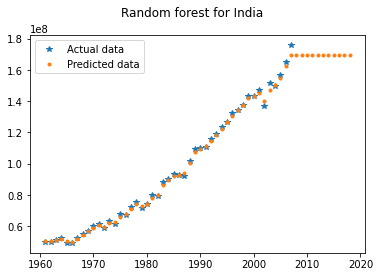

C:\Users\saumy\AppData\Local\Temp\ipykernel_23456\708172208.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(data_years, prod_country)


[88122170.1 88122170.1 88122170.1 88122170.1 88122170.1 88122170.1
 88122170.1 88122170.1 88122170.1 88122170.1 88122170.1]
MSE for country Brazil is: 444603721259.9919


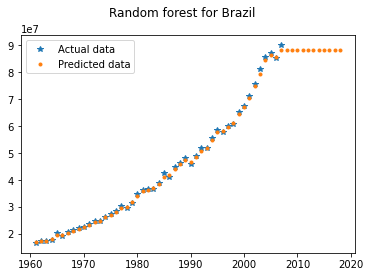

C:\Users\saumy\AppData\Local\Temp\ipykernel_23456\708172208.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(data_years, prod_country)


[34837784.7 34837784.7 34837784.7 34837784.7 34837784.7 34837784.7
 34837784.7 34837784.7 34837784.7 34837784.7 34837784.7]
MSE for country France is: 224346962208.05893


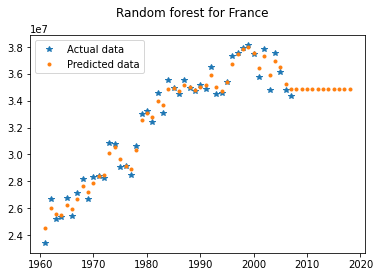

In [152]:
countries = np.array(['China', 'United States of America', 'India', 'Brazil', 'France']) #Top 5 countries excluding USSR
for country in countries:
    plot_random_forest_reg(df_reg, country)